In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('C:\\Users\\patha\\OneDrive\\Desktop\\ML Projects\\rainfall in india.csv')
df.head()

,DIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [4]:
df.shape


(4116, 19)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DIVISION  4116 non-null   object 
 1   YEAR      4116 non-null   int64  
 2   JAN       4112 non-null   float64
 3   FEB       4113 non-null   float64
 4   MAR       4110 non-null   float64
 5   APR       4112 non-null   float64
 6   MAY       4113 non-null   float64
 7   JUN       4111 non-null   float64
 8   JUL       4109 non-null   float64
 9   AUG       4112 non-null   float64
 10  SEP       4110 non-null   float64
 11  OCT       4109 non-null   float64
 12  NOV       4105 non-null   float64
 13  DEC       4106 non-null   float64
 14  ANNUAL    4090 non-null   float64
 15  Jan-Feb   4110 non-null   float64
 16  Mar-May   4107 non-null   float64
 17  Jun-Sep   4106 non-null   float64
 18  Oct-Dec   4103 non-null   float64
dtypes: float64(17), int64(1), object(1)
memory usage: 611.1+ KB


In [6]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
YEAR,4116.0,1958.218659,33.140898,1901.0,1930.000,1958.0,1987.000,2015.0
JAN,4112.0,18.957320,33.585371,0.0,0.600,6.0,22.200,583.7
FEB,4113.0,21.805325,35.909488,0.0,0.600,6.7,26.800,403.5
MAR,4110.0,27.359197,46.959424,0.0,1.000,7.8,31.300,605.6
APR,4112.0,43.127432,67.831168,0.0,3.000,15.7,49.950,595.1
MAY,4113.0,85.745417,123.234904,0.0,8.600,36.6,97.200,1168.6
JUN,4111.0,230.234444,234.710758,0.4,70.350,138.7,305.150,1609.9
JUL,4109.0,347.214334,269.539667,0.0,175.600,284.8,418.400,2362.8
AUG,4112.0,290.263497,188.770477,0.0,155.975,259.4,377.800,1664.6
SEP,4110.0,197.361922,135.408345,0.1,100.525,173.9,265.800,1222.0


In [7]:
df.isnull().sum()


DIVISION     0
YEAR         0
JAN          4
FEB          3
MAR          6
APR          4
MAY          3
JUN          5
JUL          7
AUG          4
SEP          6
OCT          7
NOV         11
DEC         10
ANNUAL      26
Jan-Feb      6
Mar-May      9
Jun-Sep     10
Oct-Dec     13
dtype: int64

In [8]:
df.columns


Index(['DIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],
      dtype='object')

In [9]:
df.rename(str.strip,
		axis='columns',
		inplace=True)

df.columns


Index(['DIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],
      dtype='object')

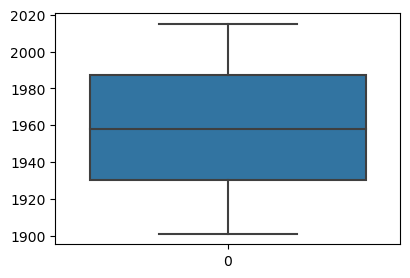

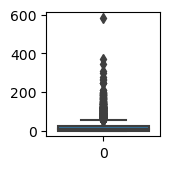

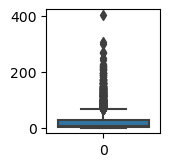

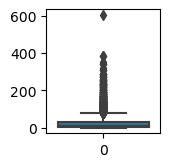

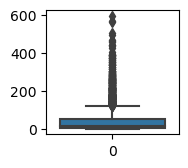

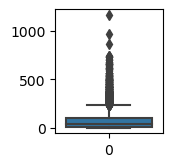

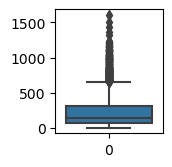

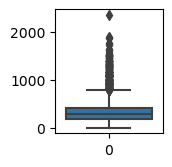

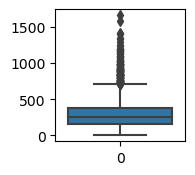

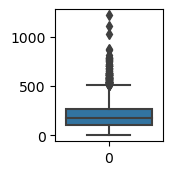

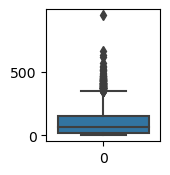

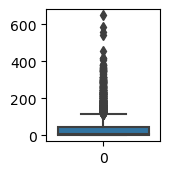

ValueError: num must be an integer with 1 <= num <= 12, not 13

<Figure size 640x480 with 0 Axes>

In [28]:
plt.subplots(figsize=(15,8))
for i, col in enumerate(features):
    plt.subplot(3,4, i + 1)
    sb.boxplot(df[col])
    plt.tight_layout()
    plt.show()


In [29]:
df.replace({'yes':1, 'no':0}, inplace=True)



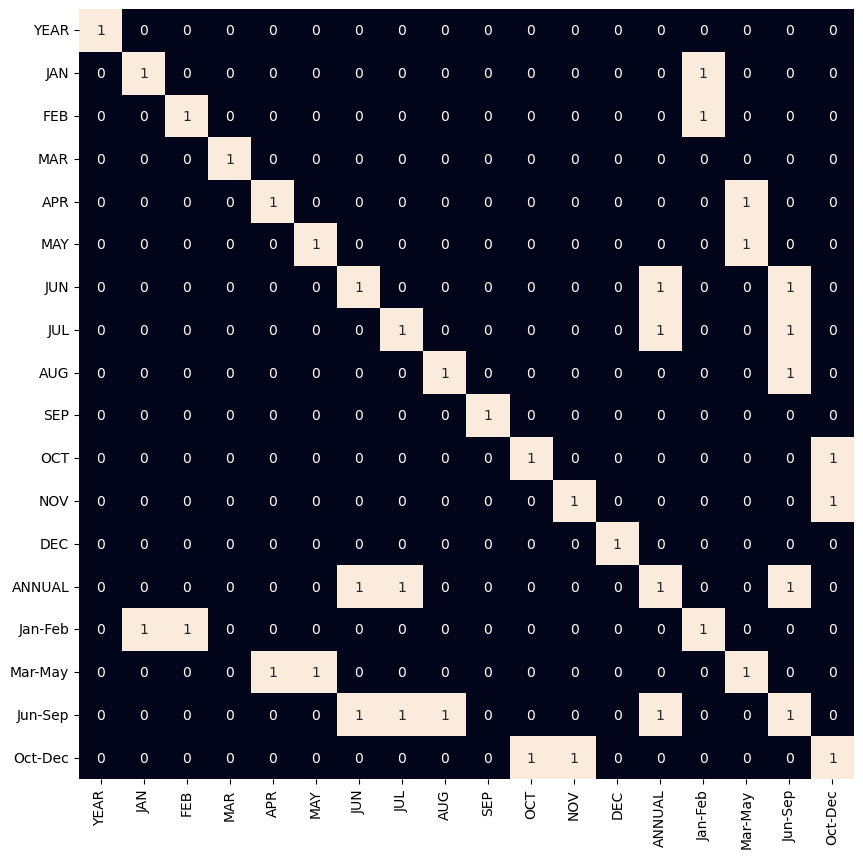

In [30]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8,
		annot=True,
		cbar=False)
plt.show()


In [33]:
import pandas as pd

# Assuming you have data to create the DataFrame
data = {
    'column1': [1, 2, 3],
    'column2': ['A', 'B', 'C'],
    # Include other columns and their data
}

# Create the DataFrame using the provided data
df = pd.DataFrame(data)

# Check the available column labels
print(df.columns)


Index(['column1', 'column2'], dtype='object')
